In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error

In [37]:
tesla=pd.read_csv("Tesla.csv.csv",index_col=['Date'], parse_dates=['Date'])


In [38]:
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [39]:
tesla_closed = tesla["Close"]
tesla_closed

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-01-28    566.900024
2020-01-29    580.989990
2020-01-30    640.809998
2020-01-31    650.570007
2020-02-03    780.000000
Name: Close, Length: 2416, dtype: float64

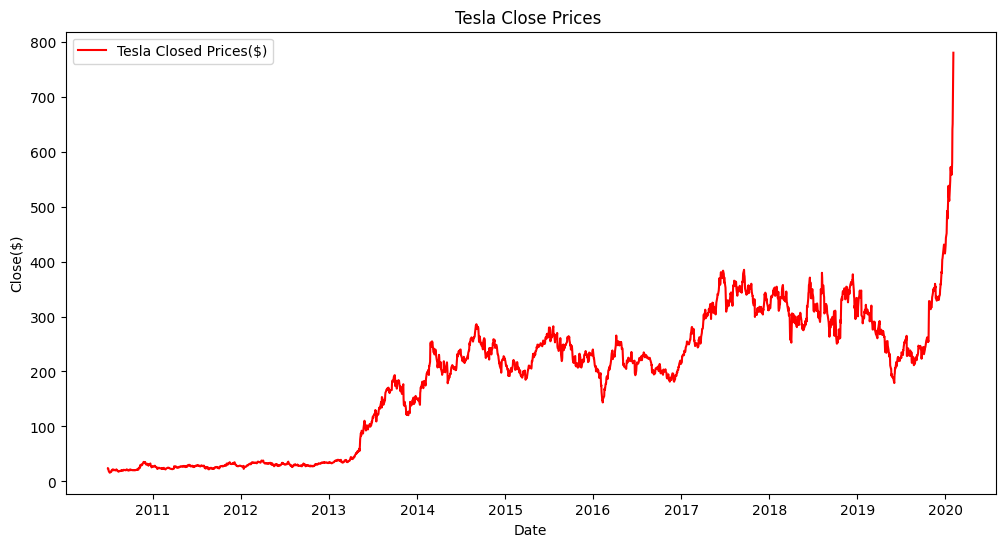

In [40]:
plt.figure(figsize=(12,6))
plt.plot(tesla_closed.index,tesla_closed,label='Tesla Closed Prices($)',color='red')
plt.title('Tesla Close Prices ')
plt.xlabel('Date')
plt.ylabel('Close($)')
plt.legend()
plt.show()

In [41]:
mean_tesla_close=tesla_closed.mean()
std_deviation=tesla_closed.std()
print(mean_tesla_close)
print(std_deviation)

186.40365078187088
119.13601997634152


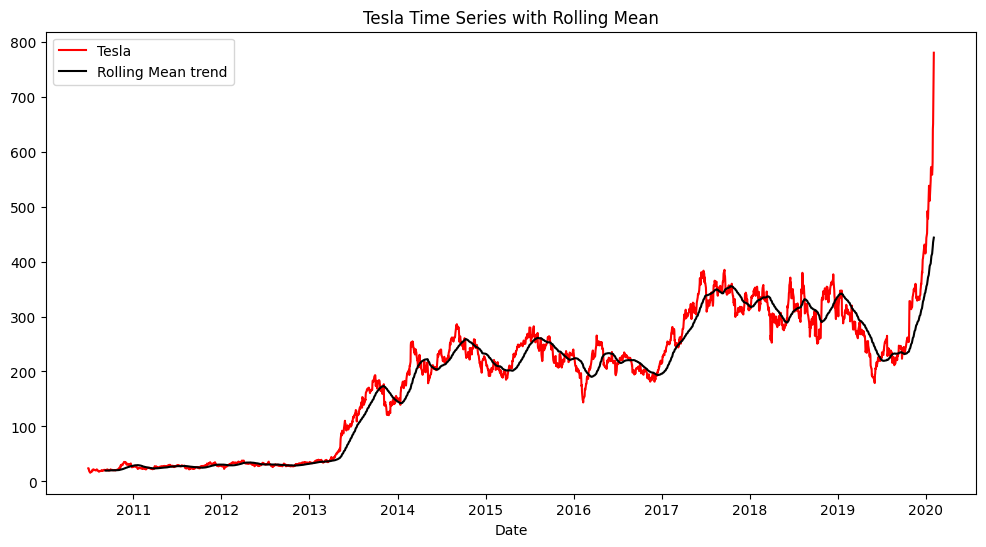

In [42]:
import pandas as pd

# Assuming tesla_closed is your time series data
# Assuming window_size is the size of the rolling window

rolling_mean = tesla_closed.rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(tesla_closed.index, tesla_closed, label='Tesla', color='red')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean trend', color='black')
plt.title('Tesla Time Series with Rolling Mean')
plt.xlabel('Date')
plt.legend()
plt.show()


In [43]:
tesla_closed_series=tesla[['Close']]
tesla_closed_series

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [48]:


scaler=MinMaxScaler()
tesla_closed_series=scaler.fit_transform(tesla_closed_series)

train_size=int(len(tesla_closed_series)*0.80)
test_size=len(tesla_closed_series)-train_size
train_data,test_data=tesla_closed_series[0:train_size],tesla_closed_series[train_size:len(tesla_closed_series)]

def create_sequences(tesla_closed_series,look_back):
    X,y=[],[]
    for i in range(len(tesla_closed_series)-look_back):
        X.append(tesla_closed_series[i:(i+look_back), 0])
        y.append(tesla_closed_series[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10

X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=2000, batch_size=32)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

Epoch 1/2000
61/61 [==============================] - 3s 8ms/step - loss: 0.0134
Epoch 2/2000
61/61 [==============================] - 0s 7ms/step - loss: 3.9060e-04
Epoch 3/2000
61/61 [==============================] - 0s 7ms/step - loss: 3.3369e-04
Epoch 4/2000
61/61 [==============================] - 0s 7ms/step - loss: 3.2259e-04
Epoch 5/2000
61/61 [==============================] - 0s 6ms/step - loss: 3.1409e-04
Epoch 6/2000
61/61 [==============================] - 0s 6ms/step - loss: 3.1327e-04
Epoch 7/2000
61/61 [==============================] - 0s 6ms/step - loss: 2.9772e-04
Epoch 8/2000
61/61 [==============================] - 0s 7ms/step - loss: 2.8966e-04
Epoch 9/2000
61/61 [==============================] - 0s 6ms/step - loss: 2.7898e-04
Epoch 10/2000
61/61 [==============================] - 0s 6ms/step - loss: 2.6753e-04
Epoch 11/2000
61/61 [==============================] - 0s 6ms/step - loss: 2.6624e-04
Epoch 12/2000
61/61 [==============================] - 0s 6ms/step 

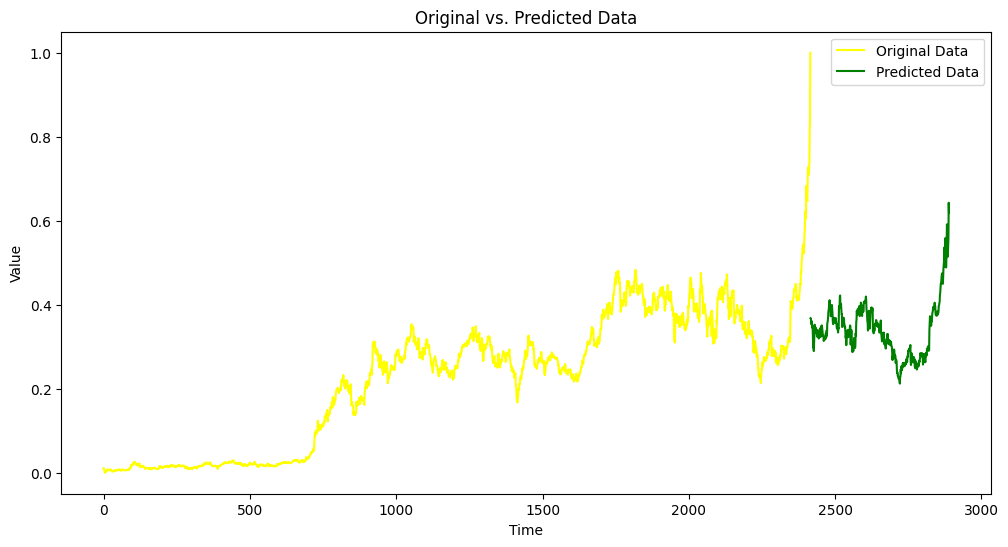

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(tesla_closed_series)), tesla_closed_series, label='Original Data', color='Yellow')
plt.plot(np.arange(len(tesla_closed_series), len(tesla_closed_series) + len(test_predict)), test_predict, label='Predicted Data', color='green')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [50]:
Tesla_predictions= tesla["Close"]
Tesla_predictions

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-01-28    566.900024
2020-01-29    580.989990
2020-01-30    640.809998
2020-01-31    650.570007
2020-02-03    780.000000
Name: Close, Length: 2416, dtype: float64

In [51]:
log_returns_Tesla = np.log(1+ Tesla_predictions.pct_change())
log_returns_Tesla.head()

Date
2010-06-29         NaN
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
Name: Close, dtype: float64

In [52]:
mean = log_returns_Tesla.mean()
var = log_returns_Tesla.var()
print(mean)
print(var)

0.0014434095238941788
0.0010578768204851513


In [53]:
stdev = log_returns_Tesla.std()
drift = mean -(0.5 * var) # u = average log return - half variance
drift
stdev
np.array(drift)
norm.ppf(0.95)

1.6448536269514722

In [54]:
x = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r
x

array([[0.79528437, 0.37563277],
       [0.86237848, 0.90256802],
       [0.61036708, 0.09605226],
       [0.72874804, 0.36888399],
       [0.87628475, 0.17241051],
       [0.96789162, 0.52407092],
       [0.57045695, 0.28780512],
       [0.26982166, 0.40254714],
       [0.95635951, 0.70958055],
       [0.99862605, 0.41383179]])

In [55]:
norm.ppf(x)

array([[ 0.8248949 , -0.31697108],
       [ 1.09106781,  1.29632379],
       [ 0.2802759 , -1.30437864],
       [ 0.60903097, -0.33481057],
       [ 1.15661304, -0.94468244],
       [ 1.85067197,  0.06037351],
       [ 0.17753765, -0.55980825],
       [-0.61335244, -0.24675961],
       [ 1.70991832,  0.55215976],
       [ 2.99461596, -0.21769908]])

In [56]:
t_intervals = 730 # tintervals = time intervals. interested in forecast stock prices for next 1000 days
iterations = 5 # asking computer to produce 10 series of future stock price predicitons


In [57]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.03951871, 0.98346194, 1.00163781, 0.9922321 , 0.96188049],
       [1.0071399 , 1.03617745, 1.01986944, 0.99387305, 0.96852959],
       [0.96072773, 0.97111114, 1.00892032, 0.99413501, 0.97653479],
       ...,
       [0.99630223, 0.95501406, 0.97480561, 1.08559107, 1.00146098],
       [1.03524286, 1.04178278, 1.04945694, 1.019844  , 1.0265523 ],
       [1.00802395, 1.03347378, 0.98373733, 1.01437048, 0.92269337]])

In [58]:
S0 = Tesla_predictions.iloc[-1]
S0

780.0

In [59]:
prices_list= np.zeros_like(daily_returns) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [60]:
prices_list[0] = S0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list

array([[780., 780., 780., 780., 780.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [61]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[ 780.        ,  780.        ,  780.        ,  780.        ,
         780.        ],
       [ 785.56912068,  808.21841233,  795.49816224,  775.22097617,
         755.45307744],
       [ 754.71803961,  784.86990512,  802.59425878,  770.67431396,
         737.72621278],
       ...,
       [1268.03616815, 1210.62640083, 2044.73543782, 1804.49925642,
        2922.26890229],
       [1312.72538479, 1261.20973567, 2145.8617948 , 1840.30774229,
        2999.8618542 ],
       [1323.2586229 , 1303.42719268, 2110.96436293, 1866.75385609,
        2767.95264096]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


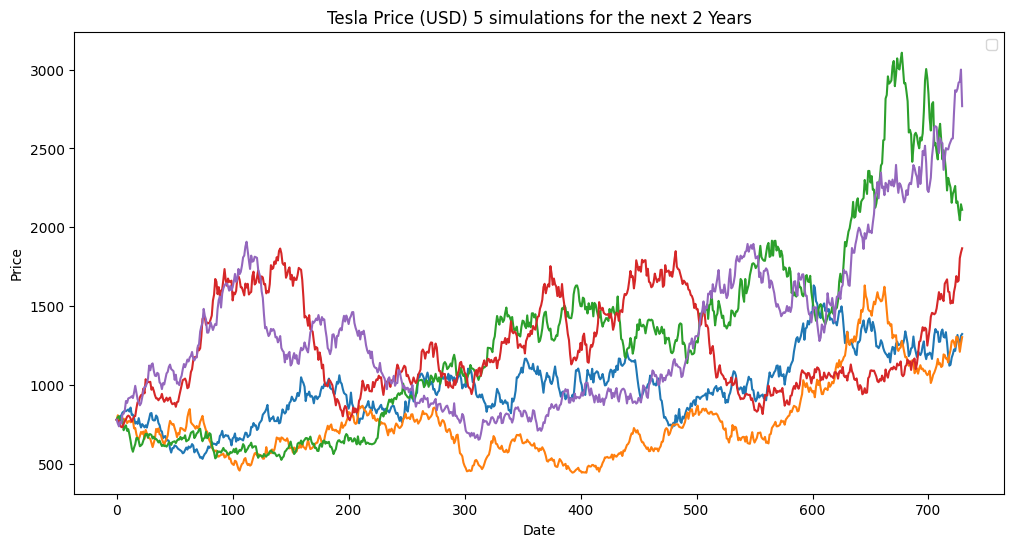

In [62]:
plt.figure(figsize=(12,6))
plt.plot(prices_list)
plt.title('Tesla Price (USD) 5 simulations for the next 2 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()